In [1]:
import matplotlib.pyplot as plt
from skest import *
import scipy
import time
from signals import *
import numpy as np

### different n
### a: 70 zeros, p = 100, n = 80, contiguous zeros, smooth and flat

In [2]:
sigma = 1

In [3]:
n = 80

In [4]:
p = 100
Psi = toeplitz(0.5, p)

In [5]:
beta_star = np.concatenate((np.zeros(40), smooth_stair(20, 5, 20, -5, 2)))

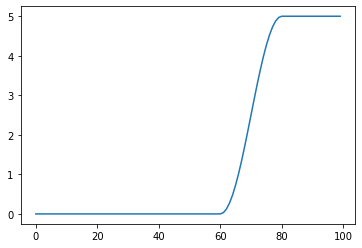

In [6]:
plt.plot(beta_star)

In [7]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)

In [8]:
D = chain_incidence(p)

In [25]:
naive_cv_cov(X)

({'t': 0.35}, 0.049173831939697266)

In [26]:
D_w = weighted_incidence(cov_est(0.35).fit(X).S)

In [11]:
D_oracle = weighted_incidence(Psi)

In [13]:
print(naive_cv_gtv_small(X, y, D_oracle))


({'l1': 3, 'l2': 7.5, 'l3': 2}, 647.3899767398834)


In [27]:
print(naive_cv_gtv_small(X, y, D_w))

({'l1': 5, 'l2': 0, 'l3': 2}, 33.463197231292725)


In [28]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 2).fit(X,y)
    clf3 = EN(l1= 2, l2=0).fit(X,y)
    clf4 = FL(0.5, 50, D).fit(X,y)
    clf5 = SL(2, 50, D).fit(X,y)
    clf6 = GTV(5, 0, 2, D_w).fit(X,y)
    clf7 = GTV(3, 7.5, 2, D_oracle).fit(X,y)
    clf8 = OUR(50, 30, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [29]:
def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 2).fit(X,y)
    clf3 = EN(l1= 2, l2=0).fit(X,y)
    clf4 = FL(0.5, 50, D).fit(X,y)
    clf5 = SL(2, 50, D).fit(X,y)
    clf6 = GTV(5, 0, 2, D_w).fit(X,y)
    clf7 = GTV(3, 7.5, 2, D_oracle).fit(X,y)
    clf8 = OUR(50, 30, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [30]:
from joblib import Parallel, delayed
import multiprocessing

In [31]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [32]:
ar1 = [l[0] for l in l2s]
ar2 = [l[1] for l in l2s]
ar3 = [l[2] for l in l2s]
ar4 = [l[3] for l in l2s]
ar5 = [l[4] for l in l2s]
ar6 = [l[5] for l in l2s]
ar7= [l[6] for l in l2s]
ar8= [l[7] for l in l2s]

In [33]:
ap1 = [l[0] for l in preds]
ap2 = [l[1] for l in preds]
ap3 = [l[2] for l in preds]
ap4 = [l[3] for l in preds]
ap5 = [l[4] for l in preds]
ap6 = [l[5] for l in preds]
ap7 = [l[6] for l in preds]
ap8 = [l[7] for l in preds]

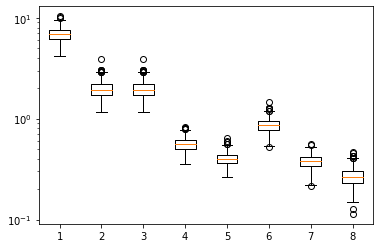

In [34]:
plt.boxplot([ar1, ar2, ar3, ar4, ar5, ar6, ar7, ar8])
plt.yscale("log")

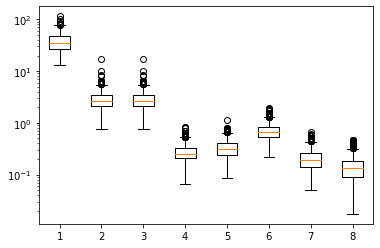

In [35]:
plt.boxplot([ap1, ap2, ap3, ap4, ap5, ap6, ap7, ap8])
plt.yscale("log")

### b) One entry is 5. Zeros not contiguous

In [9]:
part1 = np.array([0]*19 + [5] + [0]*20)

In [10]:
beta_star2 = np.concatenate((part1, smooth_stair(20, 5, 20, -5, 2)))

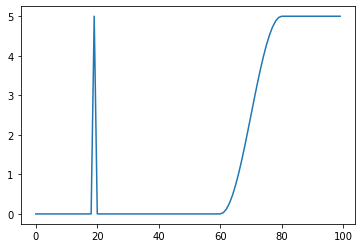

In [11]:
plt.plot(beta_star2)

In [39]:
X, y = gauss_sample(n, p, beta_star2, Psi, sigma)

In [41]:
D_w = weighted_incidence(cov_est(0.35).fit(X).S)
D_oracle = weighted_incidence(Psi)

In [43]:
print(naive_cv_gtv_small(X, y, D_oracle))

({'l1': 2, 'l2': 0, 'l3': 0.5}, 580.7430317401886)


In [42]:
print(naive_cv_gtv_small(X, y, D_w))

({'l1': 2, 'l2': 0, 'l3': 1}, 33.515281438827515)


In [44]:
def trial1():
    X, y = gauss_sample(n, p, beta_star2, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0.25).fit(X,y)
    clf3 = EN(l1= 0.25, l2=0).fit(X,y)
    clf4 = FL(2, 5, D).fit(X,y)
    clf5 = SL(3, 0.25, D).fit(X,y)
    clf6 = GTV(2, 0, 1, D_w).fit(X,y)
    clf7 = GTV(2, 0, 0.5, D_oracle).fit(X,y)
    clf8 = OUR(5, 0, D).fit(X,y)
    return [c.l2_risk(beta_star2) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [45]:
def trial2():
    X, y = gauss_sample(n, p, beta_star2, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0.25).fit(X,y)
    clf3 = EN(l1= 0.25, l2=0).fit(X,y)
    clf4 = FL(2, 5, D).fit(X,y)
    clf5 = SL(3, 0.25, D).fit(X,y)
    clf6 = GTV(2, 0, 1, D_w).fit(X,y)
    clf7 = GTV(2, 0, 0.5, D_oracle).fit(X,y)
    clf8 = OUR(5, 0, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star2, Psi, sigma)
    return [-c.score(X2, X2@beta_star2) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [46]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [47]:
br1 = [l[0] for l in l2s]
br2 = [l[1] for l in l2s]
br3 = [l[2] for l in l2s]
br4 = [l[3] for l in l2s]
br5 = [l[4] for l in l2s]
br6 = [l[5] for l in l2s]
br7 = [l[6] for l in l2s]
br8 = [l[7] for l in l2s]

In [48]:
bp1 = [l[0] for l in preds]
bp2 = [l[1] for l in preds]
bp3 = [l[2] for l in preds]
bp4 = [l[3] for l in preds]
bp5 = [l[4] for l in preds]
bp6 = [l[5] for l in preds]
bp7 = [l[6] for l in preds]
bp8 = [l[7] for l in preds]


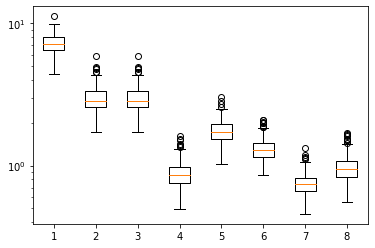

In [49]:
plt.boxplot([br1, br2, br3, br4, br5, br6, br7, br8])
plt.yscale("log")

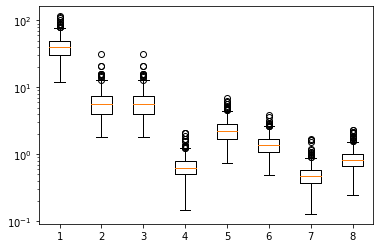

In [50]:
plt.boxplot([bp1, bp2, bp3, bp4, bp5, bp6, bp7, bp8])
plt.yscale("log")

### Tables

### plots

In [12]:
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'

In [73]:
X, y = gauss_sample(n, p, beta_star2, Psi, sigma)

In [74]:
fl_beta_b = FL(2, 5, D).fit(X,y).beta
gen_beta_b = OUR(5, 0, D).fit(X,y).beta

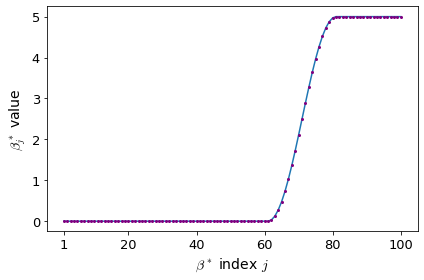

In [15]:
plt.scatter(range(1, 101), beta_star, s = 4, color = 'purple')
plt.plot(range(1, 101), beta_star, linewidth = 1.5, zorder = -1)
plt.ylabel(r'$\beta^*_j$ value', size = 14)
plt.xlabel(r'$\beta^*$ index $j$', size = 14)
plt.yticks([0, 1, 2, 3, 4, 5], size = 13)
plt.xticks([1,20, 40, 60, 80, 100],size = 13)
plt.tight_layout()
plt.savefig('171a.jpg', bbox_inches='tight', dpi = 600)

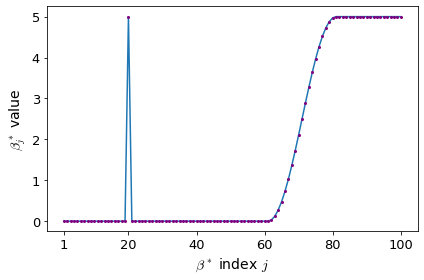

In [16]:
plt.scatter(range(1, 101), beta_star2, s = 4, color = 'purple')
plt.plot(range(1, 101), beta_star2, linewidth = 1.5, zorder = -1)
plt.ylabel(r'$\beta^*_j$ value', size = 14)
plt.xlabel(r'$\beta^*$ index $j$', size = 14)
plt.yticks([0, 1, 2, 3, 4, 5], size = 13)
plt.xticks([1,20, 40, 60, 80, 100],size = 13)
plt.tight_layout()
plt.savefig('171b.jpg', bbox_inches='tight', dpi = 600)

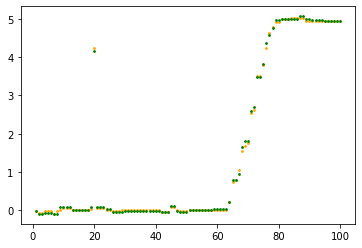

In [76]:
plt.scatter(range(1, 101), fl_beta_b, color = 'orange', s = 3)
plt.scatter(range(1, 101), gen_beta_b, color = 'green', s = 3)

In [77]:
import numpy.linalg as la

In [79]:
la.norm(beta_star, ord = 1)

147.5

In [78]:
la.norm(D@beta_star, ord = 1)

5.0

In [80]:
la.norm(D@beta_star, ord = 2)

1.240547228285882

In [81]:
la.norm(beta_star2, ord = 1)

152.5

In [82]:
la.norm(D@beta_star2, ord = 1)

15.0

In [83]:
la.norm(beta_star2, ord = 2)

26.457513110645905

In [86]:
[np.mean(r) for r in [ar1, ar2, ar3, ar4, ar5, ar6, ar7, ar8]]

[6.918376055728916,
 1.9787746905420003,
 1.9787729580429994,
 0.5618811307504449,
 0.40323852706821456,
 0.8691129696299383,
 0.3817449610529602,
 0.2682868947449044]

In [88]:
[np.std(r) for r in [ar1, ar2, ar3, ar4, ar5, ar6, ar7, ar8]]

[1.045502702237408,
 0.3632512929296491,
 0.36324929841211046,
 0.08389180643947615,
 0.05804196654526859,
 0.12576053377629934,
 0.05758631053189273,
 0.05346724274429773]

In [89]:
[np.mean(r) for r in [ap1, ap2, ap3, ap4, ap5, ap6, ap7, ap8]]

[38.12268383013247,
 2.941244392939022,
 2.9412405631760556,
 0.2786806437307035,
 0.33174135324593274,
 0.7224962416545117,
 0.2149092921639483,
 0.1494674646104249]

In [90]:
[np.std(r) for r in [ap1, ap2, ap3, ap4, ap5, ap6, ap7, ap8]]

[15.326958420887335,
 1.3493397054624188,
 1.3493341341111564,
 0.11733525221110265,
 0.1364666935242695,
 0.2631527715370109,
 0.10517846926279954,
 0.07995506979072974]

In [91]:
[np.mean(r) for r in [br1, br2, br3, br4, br5, br6, br7, br8]]

[7.250986397129346,
 2.9492633908056325,
 2.9492631806635905,
 0.8759824346587552,
 1.7539892130664685,
 1.3056552315217254,
 0.7508414791573783,
 0.9683974841275099]

In [92]:
[np.std(r) for r in [br1, br2, br3, br4, br5, br6, br7, br8]]

[1.0954571095988257,
 0.5865250683538983,
 0.5865252152395859,
 0.17005842928513992,
 0.3012104783821339,
 0.2180535095119785,
 0.12374259795779814,
 0.18400278646791834]

In [93]:
[np.mean(r) for r in [bp1, bp2, bp3, bp4, bp5, bp6, bp7, bp8]]

[41.74943450892776,
 6.186217266769955,
 6.1862131894105445,
 0.6735902613904569,
 2.3711862338715464,
 1.4437158447175036,
 0.4930863126346463,
 0.8703633179670534]

In [94]:
[np.std(r) for r in [bp1, bp2, bp3, bp4, bp5, bp6, bp7, bp8]]

[15.946423116851264,
 2.931548534517518,
 2.931548696837724,
 0.2615856365448805,
 0.9300714077500193,
 0.5012628401025848,
 0.19485396225333426,
 0.3163506878297449]